In [1]:
import pandas as pd
#reads the csv file
df=pd.read_csv('/kaggle/input/dopamine-data-csv/dopamine_data.csv',on_bad_lines='skip')
#checks if loaded properly
df.head()

,activity,duration_minutes,dopamine_level
0,study,60,50
1,study,120,35
2,gaming,30,85
3,gaming,60,90
4,eating,30,70


In [2]:
#encoding the activities to numbers
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
df['activity_encoded']=encoder.fit_transform(df['activity'])
df.head()

,activity,duration_minutes,dopamine_level,activity_encoded
0,study,60,50,5
1,study,120,35,5
2,gaming,30,85,3
3,gaming,60,90,3
4,eating,30,70,1


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

#features(x) and target(y)
X=df[['activity_encoded','duration_minutes']]
y=df['dopamine_level']

#splitting data
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)

#train model
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [4]:
new_data=pd.DataFrame({
    'activity':['study','gaming','eating','phone','cooking','exercise'],
    'duration_minutes':[30,60,20,10,0,0]
})

#encoding activities
new_data['activity_encoded']=encoder.transform(new_data['activity'])

#predict dopamine
predictions=model.predict(new_data[['activity_encoded','duration_minutes']])
new_data['predicted_dopamine']=predictions

new_data

,activity,duration_minutes,activity_encoded,predicted_dopamine
0,study,30,5,64.05
1,gaming,60,3,83.35
2,eating,20,1,72.05
3,phone,10,4,81.90
4,cooking,0,0,73.75
5,exercise,0,2,71.45


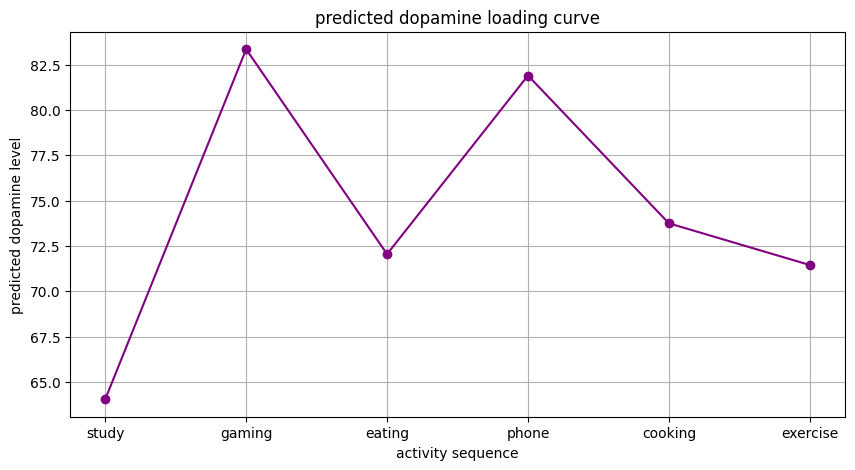

In [5]:
#plotting "dopamine loading" graph

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(new_data['activity'],new_data['predicted_dopamine'],marker='o', linestyle='-',color='purple')
plt.title('predicted dopamine loading curve')
plt.xlabel('activity sequence')
plt.ylabel('predicted dopamine level')
plt.grid(True)
plt.show()